In [69]:
%matplotlib auto

import random
import networkx as nx
import pandas as pd
#import matplotlib
#matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

Using matplotlib backend: nbAgg


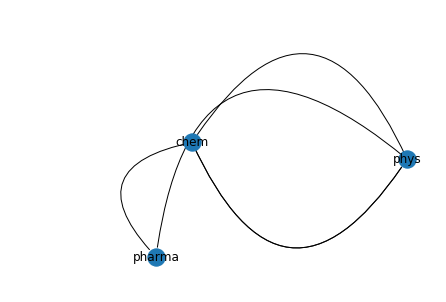

In [57]:
graph = nx.MultiDiGraph()
depts = ['phys', 'pharma', 'chem']
links = [('phys', 'pharma'), ('chem', 'pharma', {'weigth': 5}),
    ('chem', 'phys', {'weigth': 10}), ('chem', 'phys'), ('phys', 'chem')]
graph.add_nodes_from(depts)
graph.add_edges_from(links)
nx.draw(graph, with_labels=True, connectionstyle='arc3, rad=0.9', arrowsize=0.001)
#nx.draw_networkx_edges(graph, with_labels=True, connectionstyle='arc3, rad=0.1')
plt.show()

In [58]:
dataset = pd.read_excel('somos.xlsx', sheet_name='SOMOS(Controle PI)')

In [59]:
dataset

,SOMOS -Planilha Geral de Depósito,SOMOS-LATIPAT,Faculdade/Escola/Centro/Instituto,Departamento,Data Pedido,# pedido/Publicação,Título,Inventores,Num Pedido Trat,Ajuste Num Ped 2,DE PARA SOMOS LATIPAT (1),DE PARA SOMOS LATIPAT (2),OBS
0,BR1020150324944,BR102015032494,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2015-12-23,BR1020150324944,"“PEPTÍDEOS SINTÉTICOS, MÉTODO E KIT PARA DIAGN...",Eduardo Antonio Ferraz Coelho / Carlos Alberto...,BR1020150324944,1020150324944,BR1020150324944,BR102015032494,NaN
1,BR1020150318618,BR102015031861,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2015-12-18,BR1020150318618,"“PEPTÍDEOS SINTÉTICOS, MÉTODO E KIT PARA DIAGN...",Eduardo Antonio Ferraz Coelho / Carlos Alberto...,BR1020150318618,1020150318618,BR1020150318618,BR102015031861,NaN
2,C10803807-4,NaN,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2011-07-29,C1 0803807-4,FILMES POLIMÉRICOS HIDROFÍLICOS PARA LIBERAÇÃO...,André Augusto Gomes Faraco / Juçara Ribeiro Fr...,C10803807-4,C10803807,C10803807,C1080380,NaN
3,PI 0705590-0,BRPI0705590,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2007-08-07,PI 0705590-0,USO DE COMPOSIÇÃO FARMACÊUTICA CONTENDO CROTOX...,David Toledo Velarde / Geraldo Barros Ribeiro ...,PI0705590-0,PI05590,PI0705590,PI070559,NaN
4,PI 0104539-3,NaN,Faculdade de Medicina,Departamento de Oftalmologia e Otorrinolaringo...,2001-06-21,PI 0104539-3,PROCESSO PARA PURIFICAÇÃO E CARACTERIZAÇÃO DA ...,David Toledo Velarde / Geraldo Barros Ribeiro ...,PI0104539-3,PI04539,PI0104539,PI010453,NaN
5,BR1020140041087,BR102014004108,Faculdade de Medicina,Departamento de Fonoaudiologia,2014-02-21,BR1020140041087,DISPOSITIVO DE ESTIMULAÇÃO DO NISTAGMO OPTOCIN...,Patrícia Cotta Mancini / Antônio Eustáquio de ...,BR1020140041087,1020140041087,BR1020140041087,BR102014004108,NaN
6,BR1020130109711,BR102013010971,Faculdade de Medicina,Departamento de Fonoaudiologia,2013-05-03,BR 1020130109711,DISPOSITIVO PARA REABILITAR A FORÇA E A MOBILI...,Andréa Rodrigues Motta / Estevam Barbosa de La...,BR1020130109711,1020130109711,BR1020130109711,BR102013010971,NaN
7,PI 1005217-8,BRPI1005217,Faculdade de Medicina,Departamento de Fonoaudiologia,2010-12-20,PI 1005217-8,DISPOSITIVO PARA AVALIAR E TREINAR A FORÇA DA ...,Andréa Rodrigues Motta / Cláudio Gomes da Cost...,PI1005217-8,PI05217,PI1005217,PI100521,NaN
8,PI 1005052-3,BRPI1005052,Faculdade de Medicina,Departamento de Fonoaudiologia,2010-08-25,PI 1005052-3,APARELHO PARA AVALIAR E TREINAR A FORÇA DOS LÁ...,Andréa Rodrigues Motta / Cláudio Gomes da Cost...,PI1005052-3,PI05052,PI1005052,PI100505,NaN
9,PI 0802804-4,BRPI0802804,Faculdade de Medicina,Departamento de Fonoaudiologia,2008-06-02,PI 0802804-4,APARELHO FONOAUDIOLÓGICO PARA AVALIAÇÃO DA FOR...,Andréa Rodrigues Motta / Estevam Barbosa de La...,PI0802804-4,PI02804,PI0802804,PI080280,NaN


In [60]:
dataset.columns = ['n', 'latipat1', 'inst', 'dept', 'app_date', 'n_app_pub', 'title', 'inventor', 'n_app_1', 'n_app_2', 'latipat2', 'latipat3', 'obs']

In [61]:
dataset['dept'].replace(to_replace=' Departamento de Produtos Farmacêuticos', 
    value='Departamento de Produtos Farmacêuticos', inplace=True)
dataset['dept'].replace(to_replace=[' VET-DEPTO MED VETER PREVEN', 'VET-DEPTO MED VETER PREVEN'],
    value='Departamento de Medicina Veterinária Preventiva', inplace=True)
dataset['dept'].replace(to_replace=[' ICA-INSTITUTO DE CIENCIAS AGRARIAS', 'ICA-INSTITUTO DE CIENCIAS AGRARIAS'],
    value='Instituto de Ciências Agrárias', inplace=True)
dataset['dept'].replace(to_replace='ARQ-DEPTO TECNOLOGIA DO DESIGN', 
    value='Departamento de Tecnologia do Design', inplace=True)
dataset['dept'].replace(to_replace='COL-SETOR DE PATOLOGIA CLINICA', 
    value='COLTEC - Setor de Patologia Clínica', inplace=True)
dataset['dept'].replace(to_replace='COL-SETOR DE QUIMICA', 
    value='COLTEC - Setor de Química', inplace=True)
dataset['dept'].replace(to_replace='DEPTO FOTOGRAFIA E CINEMA', 
    value='Departamento de Fotografia e Cinema', inplace=True)
dataset['dept'].replace(to_replace='ENG-DEPTO ENG SANITARIA E AMBIENTAL', 
    value='Departamento de Engenharia Sanitária e Ambiental', inplace=True)
dataset['dept'].replace(to_replace='Enfermagem materno infantil e saúde pública', 
    value='Departamento de Enfermagem materno infantil e saúde pública', inplace=True)
dept_list = set(dataset['dept'].to_list())
nodes = list(dept_list)

In [62]:
edges = []
for i, data in dataset.iterrows():
    for j, data2 in dataset.iterrows():
        if (data['n'] == data2['n']) and (i < j):
            edges.append((nodes.index(data['dept']), nodes.index(data2['dept']), {'label': data['n']}))
            #print(i, j)
            #print(data['n'], data2['n'])
            #print(data['dept'], data2['dept'])
print(edges)

[(52, 37, {'label': 'BR1020150324944'}), (52, 29, {'label': 'BR1020150324944'}), (52, 37, {'label': 'BR1020150318618'}), (52, 29, {'label': 'BR1020150318618'}), (52, 26, {'label': 'C10803807-4'}), (52, 2, {'label': 'C10803807-4'}), (11, 19, {'label': 'BR1020140041087'}), (11, 34, {'label': 'BR1020130109711'}), (11, 19, {'label': 'PI 1005052-3'}), (11, 34, {'label': 'PI 1005052-3'}), (11, 34, {'label': 'PI 0802804-4'}), (11, 34, {'label': 'PI 0303631-6'}), (42, 2, {'label': 'BR1320130338671 (novo) BR1020130338672 (antigo)'}), (16, 26, {'label': 'BR1320120280050'}), (16, 22, {'label': 'BR1320120280050'}), (16, 6, {'label': 'BR1320120280050'}), (43, 35, {'label': 'NÃO TEM'}), (43, 2, {'label': 'NÃO TEM'}), (26, 24, {'label': 'BR1020150318600'}), (26, 37, {'label': 'BR1020150318600'}), (26, 31, {'label': 'BR1020150298315'}), (26, 5, {'label': 'BR1020150282621'}), (26, 1, {'label': 'BR1020150240929'}), (26, 5, {'label': 'BR1020140281711'}), (26, 32, {'label': 'BR1020140259660'}), (26, 24, {

In [75]:
node_numbers = []
for i, tup in enumerate(edges):
    node_numbers.extend((tup[0], tup[1]))
    if random.random() < .5:
        new_tup = (tup[1], tup[0], tup[2])
        edges[i] = new_tup
nodes_set = set(node_numbers)

<IPython.core.display.Javascript object>


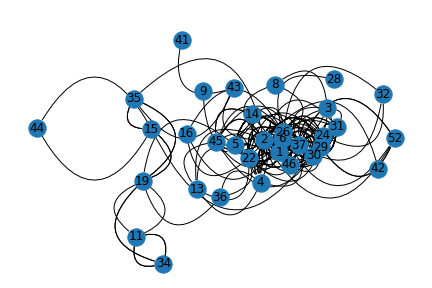

In [78]:
graph = nx.MultiDiGraph()
graph.add_nodes_from(nodes_set)
graph.add_edges_from(edges)
nx.draw(graph, with_labels=True, connectionstyle='arc3, rad=0.9', arrowsize=0.001)
#nx.draw_networkx_edges(graph, with_labels=True, connectionstyle='arc3, rad=0.1')
plt.show()

In [77]:
for element in nodes_set:
    print(element, nodes[element])

1 Departamento de Parasitologia
2 Departamento de Produtos Farmacêuticos
3 Departamento de Biologia Geral
4 Departamento de Patologia
5 Departamento de Odontologia Restauradora
6 Departamento de Fisiologia e Biofísica
8 Departamento de Farmácia Social
9 Departamento de Artes Plásticas
11 Departamento de Fonoaudiologia
13 Departamento de Clínica e Cirurgia Veterinaria
14 Departamento de Medicina Veterinária Preventiva
15 Departamento de Engenharia Elétrica
16 Departamento de Pediatria
19 Departamento de Engenharia Mecânica
22 Departamento de Morfologia
24 Departamento de Física
26 Departamento de Química
28 COLTEC - Setor de Química
29 COLTEC - Setor de Patologia Clínica
30 Departamento de Farmacologia
31 Departamento de Microbiologia
32 Departamento de Engenharia Química
34 Departamento de Engenharia de Estruturas
35 Departamento de Ciência da Computação
36 Departamento de Clínica, Patologia e Cirurgia Odontológicas
37 Departamento de Bioquímica e Imunologia
41 Departamento de Medicina